In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
from pandas.io.json import json_normalize
import csv

# Import API key
#from api_keys import weather_api_key
weather_api_key ='7b1a487e65e6dceac00ce18adc2f5d43'
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list and note the latitude
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)



612

In [42]:
print(cities)

['rikitea', 'kutum', 'hofn', 'punta arenas', 'vrangel', 'barrow', 'mar del plata', 'half moon bay', 'busselton', 'claresholm', 'san cristobal', 'sept-iles', 'cherskiy', 'bethel', 'barawe', 'vaini', 'grand river south east', 'bilma', 'mataura', 'abbeville', 'itarema', 'ushuaia', 'taolanaro', 'bichena', 'avarua', 'hithadhoo', 'cassilandia', 'hobyo', 'natal', 'hilo', 'kaitangata', 'albany', 'brokopondo', 'odweyne', 'orbetello', 'port alfred', 'eldoret', 'kapaa', 'liverpool', 'alice springs', 'serta', 'ribeira grande', 'segezha', 'new norfolk', 'provideniya', 'castro', 'puerto ayora', 'port-gentil', 'ondjiva', 'bhanjanagar', 'hobart', 'pringsewu', 'anshun', 'dolbeau', 'helena', 'talcahuano', 'araouane', 'toropets', 'vila velha', 'jamestown', 'kruisfontein', 'innisfail', 'bakong', 'nioro', 'victoria', 'ponta do sol', 'surt', 'saint george', 'puerto escondido', 'lebu', 'samusu', 'arica', 'thompson', 'hermanus', 'saint-philippe', 'illoqqortoormiut', 'shenjiamen', 'hami', 'auki', 'richards bay

In [43]:
#get the temperatures for all cities


# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"    
    
    

# city_data = []
# test_cities=['London', 'Milan', 'Glascow']
# For each city, we access its information through its API
#for city in test_cities:
for city in cities:
    # Build query URL
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    
    weather_response =requests.get(query_url)
    weather_json = weather_response.json()
    print(weather_json)
    try:
        city_data.append([weather_json['name'],weather_json['sys']['country'],weather_json['coord']['lat'], weather_json['coord']['lon'], weather_json['main']['temp'], weather_json['main']['humidity'],
                            weather_json['clouds']['all'], weather_json['wind']['speed']])
    except:
        print('Skipping city')
                         
city_df = pd.DataFrame(city_data)
city_df.columns=['City', 'Country', "lat", "long", 'city_temps', 'perc_humidity', 'perc_cloudiness', "wind_speed"]
city_df.to_csv("cities.csv", index=False)
    

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 79.11, 'feels_like': 77.72, 'temp_min': 79.11, 'temp_max': 79.11, 'pressure': 1017, 'humidity': 78, 'sea_level': 1017, 'grnd_level': 1017}, 'wind': {'speed': 17.52, 'deg': 96}, 'rain': {'3h': 0.38}, 'clouds': {'all': 100}, 'dt': 1581544926, 'sys': {'country': 'PF', 'sunrise': 1581518789, 'sunset': 1581565315}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
{'coord': {'lon': 24.67, 'lat': 14.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 49.1, 'feels_like': 38.84, 'temp_min': 49.1, 'temp_max': 49.1, 'pressure': 1020, 'humidity': 18, 'sea_level': 1020, 'grnd_level': 888}, 'wind': {'speed': 7.67, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1581544926, 'sys': {'country': 'SD', 'sunrise': 1581569167, 'sunset': 1581611111}, 'timezone': 7200,

{'coord': {'lon': 1.83, 'lat': 50.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.95, 'feels_like': 33.39, 'temp_min': 39, 'temp_max': 42.8, 'pressure': 1016, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 94}, 'dt': 1581544928, 'sys': {'type': 1, 'id': 6449, 'country': 'FR', 'sunrise': 1581491409, 'sunset': 1581527032}, 'timezone': 3600, 'id': 3038789, 'name': 'Abbeville', 'cod': 200}
{'coord': {'lon': -39.92, 'lat': -2.92}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 77.56, 'feels_like': 84.15, 'temp_min': 77.56, 'temp_max': 77.56, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1005}, 'wind': {'speed': 5.7, 'deg': 63}, 'rain': {'3h': 1.13}, 'clouds': {'all': 1}, 'dt': 1581544929, 'sys': {'country': 'BR', 'sunrise': 1581497262, 'sunset': 1581541218}, 'timezo

{'coord': {'lon': 35.27, 'lat': 0.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 62.19, 'feels_like': 60.49, 'temp_min': 62.19, 'temp_max': 62.19, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 795}, 'wind': {'speed': 6.08, 'deg': 71}, 'rain': {'3h': 0.25}, 'clouds': {'all': 97}, 'dt': 1581544931, 'sys': {'country': 'KE', 'sunrise': 1581565820, 'sunset': 1581609369}, 'timezone': 10800, 'id': 198629, 'name': 'Eldoret', 'cod': 200}
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.79, 'feels_like': 77.04, 'temp_min': 73.99, 'temp_max': 75.2, 'pressure': 1011, 'humidity': 73}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1581544931, 'sys': {'type': 1, 'id': 7865, 'country': 'US', 'sunrise': 1581527438, 'sunset': 1581568354}, 'time

{'coord': {'lon': 105.93, 'lat': 26.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 49.75, 'feels_like': 48.11, 'temp_min': 49.75, 'temp_max': 49.75, 'pressure': 1011, 'humidity': 96, 'sea_level': 1011, 'grnd_level': 867}, 'wind': {'speed': 2.42, 'deg': 213}, 'clouds': {'all': 3}, 'dt': 1581544935, 'sys': {'country': 'CN', 'sunrise': 1581550455, 'sunset': 1581590818}, 'timezone': 28800, 'id': 1817968, 'name': 'Anshun', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Skipping city
{'coord': {'lon': -112.04, 'lat': 46.59}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.71, 'feels_like': 19.08, 'temp_min': 24.01, 'temp_max': 28.99, 'pressure': 1021, 'humidity': 50}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 10}, 'clouds': {'all': 90}, 'dt': 1581544726, 'sys': {'type': 1, 'id': 4381, 'country': 'US', 'sunrise': 

{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 65.35, 'feels_like': 57.69, 'temp_min': 65.35, 'temp_max': 65.35, 'pressure': 1017, 'humidity': 47, 'sea_level': 1017, 'grnd_level': 999}, 'wind': {'speed': 11.39, 'deg': 206}, 'clouds': {'all': 0}, 'dt': 1581544938, 'sys': {'country': 'CL', 'sunrise': 1581502852, 'sunset': 1581551819}, 'timezone': -10800, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Skipping city
{'coord': {'lon': -70.3, 'lat': -18.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 73.44, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1010, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1581544938, 'sys': {'type': 1, 'id': 8476, 'country': 'CL', 'sunrise': 1581

{'coord': {'lon': -54.38, 'lat': -33.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 76.48, 'feels_like': 68.74, 'temp_min': 76.48, 'temp_max': 76.48, 'pressure': 1015, 'humidity': 49, 'sea_level': 1015, 'grnd_level': 999}, 'wind': {'speed': 17, 'deg': 80}, 'clouds': {'all': 98}, 'dt': 1581544941, 'sys': {'country': 'UY', 'sunrise': 1581498636, 'sunset': 1581546785}, 'timezone': -10800, 'id': 3439781, 'name': 'Treinta y Tres', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Skipping city
{'coord': {'lon': 14.52, 'lat': 66.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 26.91, 'temp_min': 32, 'temp_max': 32, 'pressure': 981, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1581544941, 'sys': {'type': 1, 'id': 1651, 'country': 'NO', 'sunrise':

{'coord': {'lon': -8.62, 'lat': 41.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54, 'feels_like': 52.59, 'temp_min': 52, 'temp_max': 55.4, 'pressure': 1023, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1581544944, 'sys': {'type': 1, 'id': 6900, 'country': 'PT', 'sunrise': 1581492878, 'sunset': 1581530578}, 'timezone': 0, 'id': 2742416, 'name': 'Barcelos', 'cod': 200}
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.31, 'feels_like': 83.28, 'temp_min': 80.01, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1581544944, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1581559143, 'sunset': 1581605251}, 'timezone': 14400,

{'coord': {'lon': 19.12, 'lat': -24.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 75.79, 'feels_like': 73.13, 'temp_min': 75.79, 'temp_max': 75.79, 'pressure': 1013, 'humidity': 45, 'sea_level': 1013, 'grnd_level': 880}, 'wind': {'speed': 6.35, 'deg': 71}, 'rain': {'3h': 0.31}, 'clouds': {'all': 16}, 'dt': 1581544948, 'sys': {'country': 'NA', 'sunrise': 1581568157, 'sunset': 1581614785}, 'timezone': 7200, 'id': 3358666, 'name': 'Aranos', 'cod': 200}
{'coord': {'lon': 3.41, 'lat': 50.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 39.96, 'feels_like': 31.86, 'temp_min': 37.99, 'temp_max': 42.01, 'pressure': 1017, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 190}, 'clouds': {'all': 19}, 'dt': 1581544948, 'sys': {'type': 1, 'id': 6446, 'country': 'FR', 'sunrise': 1581491033, 'sunset': 1581526649}, 'timezone

{'coord': {'lon': -89.67, 'lat': 21.28}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 95.77, 'feels_like': 84.92, 'temp_min': 95, 'temp_max': 96.8, 'pressure': 1009, 'humidity': 37}, 'visibility': 11265, 'wind': {'speed': 28.86, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1581544951, 'sys': {'type': 1, 'id': 7140, 'country': 'MX', 'sunrise': 1581510675, 'sunset': 1581551685}, 'timezone': -21600, 'id': 3521108, 'name': 'Progreso', 'cod': 200}
{'coord': {'lon': 88.4, 'lat': 69.49}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 8.6, 'feels_like': -13.86, 'temp_min': 8.6, 'temp_max': 8.6, 'pressure': 1012, 'humidity': 84}, 'visibility': 500, 'wind': {'speed': 29.08, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1581544951, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1581562179, 'sunset': 1581587508}, 'timezone': 25200, 'id': 1

{'coord': {'lon': 132.75, 'lat': -5.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 82.8, 'feels_like': 84.96, 'temp_min': 82.8, 'temp_max': 82.8, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_level': 1005}, 'wind': {'speed': 14.36, 'deg': 299}, 'rain': {'3h': 0.69}, 'clouds': {'all': 72}, 'dt': 1581544954, 'sys': {'country': 'ID', 'sunrise': 1581542062, 'sunset': 1581586337}, 'timezone': 32400, 'id': 1623197, 'name': 'Tual', 'cod': 200}
{'coord': {'lon': -39.27, 'lat': -3.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 77.11, 'feels_like': 84, 'temp_min': 77.11, 'temp_max': 77.11, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 989}, 'wind': {'speed': 3.38, 'deg': 66}, 'rain': {'3h': 0.56}, 'clouds': {'all': 14}, 'dt': 1581544954, 'sys': {'country': 'BR', 'sunrise': 1581497085, 'sunset': 1581541084}, '

{'coord': {'lon': 113.63, 'lat': -24.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 72.82, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1581544956, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1581545410, 'sunset': 1581592166}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Skipping city
{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': 0.03, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 1019, 'humidity': 85}, 'visibility': 5000, 'wind': {'speed': 11.18, 'deg': 70, 'gust': 20.13}, 'clouds': 

{'coord': {'lon': 147.92, 'lat': 70.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': -24.61, 'feels_like': -33.23, 'temp_min': -24.61, 'temp_max': -24.61, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1014}, 'wind': {'speed': 2.91, 'deg': 222}, 'clouds': {'all': 100}, 'dt': 1581544958, 'sys': {'country': 'RU', 'sunrise': 1581548635, 'sunset': 1581572483}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
{'coord': {'lon': -34.86, 'lat': -8.01}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 90.01, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1581544959, 'sys': {'type': 1, 'id': 8426, 'country': 'BR', 'sunrise': 1581495742, 'sunset': 1581540310}, 'timezone': -

{'coord': {'lon': -114.06, 'lat': 27.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 66.79, 'feels_like': 59.77, 'temp_min': 66.79, 'temp_max': 66.79, 'pressure': 1018, 'humidity': 29, 'sea_level': 1018, 'grnd_level': 1016}, 'wind': {'speed': 6.53, 'deg': 291}, 'clouds': {'all': 0}, 'dt': 1581544961, 'sys': {'country': 'MX', 'sunrise': 1581516994, 'sunset': 1581557073}, 'timezone': -25200, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
{'coord': {'lon': 120.47, 'lat': -8.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 67.1, 'feels_like': 69.94, 'temp_min': 67.1, 'temp_max': 67.1, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 927}, 'wind': {'speed': 3.38, 'deg': 184}, 'clouds': {'all': 100}, 'dt': 1581544961, 'sys': {'country': 'ID', 'sunrise': 1581544833, 'sunset': 1581589460}, 'timezone': 28800, 'id'

{'coord': {'lon': 49.18, 'lat': 11.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 77.11, 'feels_like': 73.09, 'temp_min': 77.11, 'temp_max': 77.11, 'pressure': 1018, 'humidity': 74, 'sea_level': 1018, 'grnd_level': 1018}, 'wind': {'speed': 19.08, 'deg': 67}, 'clouds': {'all': 0}, 'dt': 1581544963, 'sys': {'country': 'SO', 'sunrise': 1581563110, 'sunset': 1581605403}, 'timezone': 10800, 'id': 64013, 'name': 'Bosaso', 'cod': 200}
{'coord': {'lon': 23.68, 'lat': 70.66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.33, 'feels_like': 19.06, 'temp_min': 33.8, 'temp_max': 37.4, 'pressure': 974, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1581544963, 'sys': {'type': 1, 'id': 1632, 'country': 'NO', 'sunrise': 1581492279, 'sunset': 1581515673}, 'timezone': 3600, 'id': 779683,

{'coord': {'lon': -81.72, 'lat': 43.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.5, 'feels_like': 20.08, 'temp_min': 28.99, 'temp_max': 34, 'pressure': 1013, 'humidity': 80}, 'wind': {'speed': 12.53, 'deg': 208}, 'clouds': {'all': 100}, 'dt': 1581544966, 'sys': {'type': 3, 'id': 2008021, 'country': 'CA', 'sunrise': 1581510643, 'sunset': 1581547902}, 'timezone': -18000, 'id': 5962442, 'name': 'Goderich', 'cod': 200}
{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': -4.81, 'feels_like': -12.82, 'temp_min': -4.81, 'temp_max': -4.81, 'pressure': 1016, 'humidity': 71, 'sea_level': 1016, 'grnd_level': 1015}, 'wind': {'speed': 2.33, 'deg': 158}, 'clouds': {'all': 0}, 'dt': 1581544806, 'sys': {'country': 'RU', 'sunrise': 1581542706, 'sunset': 1581567664}, 'timezone': 43200, 'id': 2122090, 'name

{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -6.66, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 1000, 'humidity': 41}, 'wind': {'speed': 2.24}, 'clouds': {'all': 54}, 'dt': 1581544968, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1581509280, 'sunset': 1581534566}, 'timezone': -10800, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
{'coord': {'lon': 29.73, 'lat': 52.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 32.7, 'feels_like': 22.73, 'temp_min': 32.7, 'temp_max': 32.7, 'pressure': 1005, 'humidity': 89, 'sea_level': 1005, 'grnd_level': 988}, 'wind': {'speed': 10.8, 'deg': 271}, 'clouds': {'all': 100}, 'dt': 1581544968, 'sys': {'country': 'BY', 'sunrise': 1581571389, 'sunset': 1581606459}, 'timezone': 10800, 'id': 10722858, 'name': 'Svetlogorsk',

{'coord': {'lon': -75.02, 'lat': -7.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 95.54, 'feels_like': 96.06, 'temp_min': 95.54, 'temp_max': 95.54, 'pressure': 1004, 'humidity': 33, 'sea_level': 1004, 'grnd_level': 987}, 'wind': {'speed': 6.11, 'deg': 4}, 'clouds': {'all': 4}, 'dt': 1581544971, 'sys': {'country': 'PE', 'sunrise': 1581505423, 'sunset': 1581549906}, 'timezone': -18000, 'id': 3697838, 'name': 'Contamana', 'cod': 200}
{'coord': {'lon': -58.65, 'lat': 51.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 20.17, 'feels_like': 8.71, 'temp_min': 20.17, 'temp_max': 20.17, 'pressure': 1001, 'humidity': 81, 'sea_level': 1001, 'grnd_level': 1001}, 'wind': {'speed': 10.76, 'deg': 295}, 'clouds': {'all': 3}, 'dt': 1581544971, 'sys': {'country': 'CA', 'sunrise': 1581506071, 'sunset': 1581541400}, 'timezone': -14400, 'id': 6137462, 'n

{'coord': {'lon': 150.67, 'lat': -10.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 78.24, 'feels_like': 85.19, 'temp_min': 78.24, 'temp_max': 78.24, 'pressure': 1007, 'humidity': 89, 'sea_level': 1007, 'grnd_level': 992}, 'wind': {'speed': 5.75, 'deg': 325}, 'clouds': {'all': 91}, 'dt': 1581544973, 'sys': {'country': 'PG', 'sunrise': 1581537462, 'sunset': 1581582335}, 'timezone': 36000, 'id': 2132606, 'name': 'Samarai', 'cod': 200}
{'coord': {'lon': -86.8, 'lat': 15.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 77.74, 'feels_like': 73.99, 'temp_min': 77.74, 'temp_max': 77.74, 'pressure': 1010, 'humidity': 38, 'sea_level': 1010, 'grnd_level': 875}, 'wind': {'speed': 6.85, 'deg': 121}, 'clouds': {'all': 0}, 'dt': 1581544974, 'sys': {'country': 'HN', 'sunrise': 1581509588, 'sunset': 1581551395}, 'timezone': -21600, 'id': 36050

{'coord': {'lon': 24.66, 'lat': 71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 31.98, 'feels_like': 15.12, 'temp_min': 30.2, 'temp_max': 33.8, 'pressure': 975, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 21.92, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1581544976, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 1581492281, 'sunset': 1581515200}, 'timezone': 3600, 'id': 779622, 'name': 'Avanuorri', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Skipping city
{'coord': {'lon': 20.03, 'lat': 45.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43, 'feels_like': 35.11, 'temp_min': 43, 'temp_max': 43, 'pressure': 1012, 'humidity': 33}, 'wind': {'speed': 4.47, 'deg': 192}, 'clouds': {'all': 99}, 'dt': 1581544977, 'sys': {'type': 3, 'id': 2013713, 'country': 'RS', 'sunrise': 1581486462, 'su

{'coord': {'lon': -43.77, 'lat': -14.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 77.74, 'feels_like': 84.94, 'temp_min': 77.74, 'temp_max': 77.74, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 955}, 'wind': {'speed': 4.14, 'deg': 187}, 'rain': {'3h': 1}, 'clouds': {'all': 100}, 'dt': 1581544979, 'sys': {'country': 'BR', 'sunrise': 1581497489, 'sunset': 1581542840}, 'timezone': -10800, 'id': 3466950, 'name': 'Carinhanha', 'cod': 200}
{'coord': {'lon': 112.23, 'lat': 30.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 47.84, 'temp_min': 50, 'temp_max': 50, 'pressure': 1003, 'humidity': 95}, 'wind': {'speed': 3.33, 'deg': 179}, 'clouds': {'all': 0}, 'dt': 1581544979, 'sys': {'type': 3, 'id': 2000150, 'country': 'CN', 'sunrise': 1581549240, 'sunset': 1581589008}, 'timezone': 28800, 'id': 1816221

{'coord': {'lon': 121.9, 'lat': -33.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 64.18, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1016, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1581544982, 'sys': {'type': 1, 'id': 9525, 'country': 'AU', 'sunrise': 1581542701, 'sunset': 1581590905}, 'timezone': 28800, 'id': 2071860, 'name': 'Esperance', 'cod': 200}
{'coord': {'lon': 135.48, 'lat': -3.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 71.64, 'feels_like': 78.49, 'temp_min': 71.64, 'temp_max': 71.64, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 990}, 'wind': {'speed': 2.04, 'deg': 128}, 'clouds': {'all': 96}, 'dt': 1581544982, 'sys': {'country': 'ID', 'sunrise': 1581541542, 'sunset': 1581585547}, 'timezone': 3240

{'coord': {'lon': 72.93, 'lat': 0.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 82.67, 'feels_like': 87.31, 'temp_min': 82.67, 'temp_max': 82.67, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 10.63, 'deg': 22}, 'clouds': {'all': 100}, 'dt': 1581544985, 'sys': {'country': 'MV', 'sunrise': 1581556782, 'sunset': 1581600330}, 'timezone': 18000, 'id': 1337610, 'name': 'Thinadhoo', 'cod': 200}
{'coord': {'lon': 129.67, 'lat': 62.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -23.8, 'feels_like': -34.58, 'temp_min': -23.8, 'temp_max': -23.8, 'pressure': 1022, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 200}, 'clouds': {'all': 100}, 'dt': 1581544985, 'sys': {'type': 1, 'id': 8854, 'country': 'RU', 'sunrise': 1581549582, 'sunset': 1581580295}, 'timezone'

{'coord': {'lon': 57.44, 'lat': 52.23}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': 10.71, 'feels_like': 4.57, 'temp_min': 10.71, 'temp_max': 10.71, 'pressure': 1017, 'humidity': 96, 'sea_level': 1017, 'grnd_level': 958}, 'wind': {'speed': 0.6, 'deg': 211}, 'snow': {'3h': 0.13}, 'clouds': {'all': 100}, 'dt': 1581544987, 'sys': {'country': 'RU', 'sunrise': 1581564686, 'sunset': 1581599862}, 'timezone': 18000, 'id': 462626, 'name': 'Zilair', 'cod': 200}
{'coord': {'lon': -77.63, 'lat': 49.75}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -0.4, 'feels_like': -15.3, 'temp_min': -0.4, 'temp_max': -0.4, 'pressure': 1007, 'humidity': 84}, 'visibility': 1006, 'wind': {'speed': 14.99, 'deg': 340, 'gust': 26.4}, 'clouds': {'all': 90}, 'dt': 1581544987, 'sys': {'type': 1, 'id': 866, 'country': 'CA', 'sunrise': 1581510407, 'sunset': 1581546174}, 

{'coord': {'lon': 118.96, 'lat': 42.27}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 30.36, 'feels_like': 21.22, 'temp_min': 30.36, 'temp_max': 30.36, 'pressure': 1010, 'humidity': 66, 'sea_level': 1010, 'grnd_level': 919}, 'wind': {'speed': 7.43, 'deg': 228}, 'clouds': {'all': 31}, 'dt': 1581544990, 'sys': {'country': 'CN', 'sunrise': 1581548685, 'sunset': 1581586333}, 'timezone': 28800, 'id': 2038067, 'name': 'Chifeng', 'cod': 200}
{'coord': {'lon': -65.02, 'lat': -0.41}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 91.38, 'feels_like': 98.1, 'temp_min': 91.38, 'temp_max': 91.38, 'pressure': 1006, 'humidity': 51, 'sea_level': 1006, 'grnd_level': 1000}, 'wind': {'speed': 2.24, 'deg': 180}, 'clouds': {'all': 97}, 'dt': 1581544990, 'sys': {'country': 'BR', 'sunrise': 1581503435, 'sunset': 1581547094}, 'timezone': -14400, 'i

{'coord': {'lon': 152.17, 'lat': -4.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 83.25, 'feels_like': 83.97, 'temp_min': 83.25, 'temp_max': 83.25, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 17.78, 'deg': 293}, 'rain': {'3h': 0.25}, 'clouds': {'all': 100}, 'dt': 1581544992, 'sys': {'country': 'PG', 'sunrise': 1581537487, 'sunset': 1581581590}, 'timezone': 36000, 'id': 2087894, 'name': 'Rabaul', 'cod': 200}
{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 64.6, 'feels_like': 60.98, 'temp_min': 64.6, 'temp_max': 64.6, 'pressure': 1005, 'humidity': 62, 'sea_level': 1005, 'grnd_level': 1003}, 'wind': {'speed': 7.2, 'deg': 92}, 'rain': {'3h': 0.19}, 'clouds': {'all': 35}, 'dt': 1581544992, 'sys': {'country': 'AR', 'sunrise': 1581500179, 'sunset': 1581550388

{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.82, 'feels_like': 66.27, 'temp_min': 71.6, 'temp_max': 72, 'pressure': 1010, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1581544832, 'sys': {'type': 1, 'id': 8488, 'country': 'CL', 'sunrise': 1581503248, 'sunset': 1581549863}, 'timezone': -10800, 'id': 3899539, 'name': 'Antofagasta', 'cod': 200}
{'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 6.66, 'feels_like': -3.12, 'temp_min': 6.66, 'temp_max': 6.66, 'pressure': 1018, 'humidity': 91, 'sea_level': 1018, 'grnd_level': 1017}, 'wind': {'speed': 6.55, 'deg': 67}, 'clouds': {'all': 100}, 'dt': 1581544995, 'sys': {'country': 'RU', 'sunrise': 1581537789, 'sunset': 1581568256}, 'timezone': 4

{'coord': {'lon': 19.9, 'lat': 4.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 76.24, 'feels_like': 72.72, 'temp_min': 76.24, 'temp_max': 76.24, 'pressure': 1010, 'humidity': 29, 'sea_level': 1010, 'grnd_level': 962}, 'wind': {'speed': 2.91, 'deg': 330}, 'clouds': {'all': 70}, 'dt': 1581544997, 'sys': {'country': 'CD', 'sunrise': 1581483326, 'sunset': 1581526441}, 'timezone': 3600, 'id': 2316473, 'name': 'Bosobolo', 'cod': 200}
{'coord': {'lon': 38.31, 'lat': 6.41}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 55.65, 'feels_like': 54.93, 'temp_min': 55.65, 'temp_max': 55.65, 'pressure': 1018, 'humidity': 91, 'sea_level': 1018, 'grnd_level': 764}, 'wind': {'speed': 2.98, 'deg': 137}, 'rain': {'3h': 0.56}, 'clouds': {'all': 79}, 'dt': 1581544997, 'sys': {'country': 'ET', 'sunrise': 1581565432, 'sunset': 1581608298}, 'timezone': 108

{'coord': {'lon': 139.87, 'lat': 34.98}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 59.4, 'feels_like': 52.16, 'temp_min': 57.99, 'temp_max': 61, 'pressure': 1017, 'humidity': 82}, 'visibility': 5000, 'wind': {'speed': 14.99, 'deg': 220, 'gust': 31.09}, 'clouds': {'all': 75}, 'dt': 1581545000, 'sys': {'type': 1, 'id': 8052, 'country': 'JP', 'sunrise': 1581542988, 'sunset': 1581581994}, 'timezone': 32400, 'id': 1850523, 'name': 'Tateyama', 'cod': 200}
{'coord': {'lon': 111.89, 'lat': -8.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 73.53, 'feels_like': 79.12, 'temp_min': 73.53, 'temp_max': 73.53, 'pressure': 1010, 'humidity': 92, 'sea_level': 1010, 'grnd_level': 991}, 'wind': {'speed': 4.59, 'deg': 17}, 'clouds': {'all': 99}, 'dt': 1581545000, 'sys': {'country': 'ID', 'sunrise': 1581546922, 'sunset': 1581591489}, 'timezone': 2520

{'coord': {'lon': 155.63, 'lat': -6.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 83.68, 'feels_like': 82.9, 'temp_min': 83.68, 'temp_max': 83.68, 'pressure': 1008, 'humidity': 78, 'sea_level': 1008, 'grnd_level': 1005}, 'wind': {'speed': 20.89, 'deg': 321}, 'clouds': {'all': 100}, 'dt': 1581545002, 'sys': {'country': 'PG', 'sunrise': 1581536537, 'sunset': 1581580880}, 'timezone': 39600, 'id': 2094027, 'name': 'Kieta', 'cod': 200}
{'coord': {'lon': 16.43, 'lat': -28.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 67.42, 'feels_like': 70.27, 'temp_min': 67.42, 'temp_max': 67.42, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1000}, 'wind': {'speed': 1.7, 'deg': 220}, 'clouds': {'all': 89}, 'dt': 1581545002, 'sys': {'country': 'NA', 'sunrise': 1581568472, 'sunset': 1581615760}, 'timezone': 7200, 'id':

{'coord': {'lon': 103.11, 'lat': 17.36}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 78.17, 'feels_like': 78.49, 'temp_min': 78.17, 'temp_max': 78.17, 'pressure': 1011, 'humidity': 47, 'sea_level': 1011, 'grnd_level': 989}, 'wind': {'speed': 2.91, 'deg': 225}, 'clouds': {'all': 90}, 'dt': 1581545005, 'sys': {'country': 'TH', 'sunrise': 1581550541, 'sunset': 1581592085}, 'timezone': 25200, 'id': 1608251, 'name': 'Nong Han', 'cod': 200}
{'coord': {'lon': -8.82, 'lat': 53.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 28.33, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 989, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 25.28, 'deg': 140, 'gust': 36.91}, 'clouds': {'all': 75}, 'dt': 1581545005, 'sys': {'type': 1, 'id': 1569, 'country': 'IE', 'sunrise': 1581494416, 'sunset': 1581529137}, 'timezone

{'coord': {'lon': 135.6, 'lat': 70.02}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'model', 'main': {'temp': -17.7, 'feels_like': -25.85, 'temp_min': -17.7, 'temp_max': -17.7, 'pressure': 1019, 'humidity': 97, 'sea_level': 1019, 'grnd_level': 994}, 'wind': {'speed': 2.35, 'deg': 219}, 'snow': {'3h': 0.13}, 'clouds': {'all': 100}, 'dt': 1581545007, 'sys': {'country': 'RU', 'sunrise': 1581551197, 'sunset': 1581575834}, 'timezone': 36000, 'id': 2013921, 'name': 'Ust-Kuyga', 'cod': 200}
{'coord': {'lon': 113.55, 'lat': 22.2}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 65.73, 'feels_like': 69.46, 'temp_min': 64, 'temp_max': 68, 'pressure': 1014, 'humidity': 100}, 'visibility': 1800, 'wind': {'speed': 3.36, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1581544902, 'sys': {'type': 1, 'id': 9204, 'country': 'MO', 'sunrise': 1581548349, 'sunset': 1581589266}, 'timezone': 28800,

{'cod': '404', 'message': 'city not found'}
Skipping city
{'coord': {'lon': 48.02, 'lat': -22.13}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 74.35, 'feels_like': 81.57, 'temp_min': 74.35, 'temp_max': 74.35, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 1011}, 'wind': {'speed': 3.09, 'deg': 210}, 'rain': {'3h': 5.5}, 'clouds': {'all': 49}, 'dt': 1581545010, 'sys': {'country': 'MG', 'sunrise': 1581561359, 'sunset': 1581607710}, 'timezone': 10800, 'id': 1061605, 'name': 'Manakara', 'cod': 200}
{'coord': {'lon': -91.92, 'lat': 50.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -12.3, 'feels_like': -24.38, 'temp_min': -13, 'temp_max': -11.2, 'pressure': 1021, 'humidity': 57}, 'visibility': 24140, 'wind': {'speed': 9.17, 'deg': 320, 'gust': 17.22}, 'clouds': {'all': 5}, 'dt': 1581545010, 'sys': {'type': 1, 'id': 9

{'coord': {'lon': 74.81, 'lat': 54.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': -1.08, 'feels_like': -13.49, 'temp_min': -1.08, 'temp_max': -1.08, 'pressure': 1029, 'humidity': 79, 'sea_level': 1029, 'grnd_level': 1016}, 'wind': {'speed': 10.42, 'deg': 143}, 'clouds': {'all': 2}, 'dt': 1581545012, 'sys': {'country': 'RU', 'sunrise': 1581560834, 'sunset': 1581595376}, 'timezone': 21600, 'id': 1508138, 'name': 'Cherlak', 'cod': 200}
{'coord': {'lon': -61.75, 'lat': 12.06}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 81.43, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1581544864, 'sys': {'type': 1, 'id': 8781, 'country': 'GD', 'sunrise': 1581503392, 'sunset': 1581545567}, 'timezone': -14400, 'i

{'coord': {'lon': 49.25, 'lat': 39.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 46.71, 'feels_like': 29.59, 'temp_min': 46.71, 'temp_max': 46.71, 'pressure': 1015, 'humidity': 47, 'sea_level': 1015, 'grnd_level': 1019}, 'wind': {'speed': 22.97, 'deg': 283}, 'clouds': {'all': 92}, 'dt': 1581544744, 'sys': {'country': 'AZ', 'sunrise': 1581565113, 'sunset': 1581603365}, 'timezone': 14400, 'id': 147425, 'name': 'Neftcala', 'cod': 200}
{'coord': {'lon': 143.12, 'lat': 49.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'model', 'main': {'temp': 16.75, 'feels_like': 9.73, 'temp_min': 16.75, 'temp_max': 16.75, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1002}, 'wind': {'speed': 2.71, 'deg': 280}, 'clouds': {'all': 15}, 'dt': 1581545015, 'sys': {'country': 'RU', 'sunrise': 1581543715, 'sunset': 1581579707}, 'timezone': 39600, 'id': 21

{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 79.75, 'feels_like': 86.45, 'temp_min': 79.75, 'temp_max': 79.75, 'pressure': 1012, 'humidity': 81, 'sea_level': 1012, 'grnd_level': 1004}, 'wind': {'speed': 4.88, 'deg': 175}, 'clouds': {'all': 9}, 'dt': 1581545017, 'sys': {'country': 'GH', 'sunrise': 1581488680, 'sunset': 1581531714}, 'timezone': 0, 'id': 2303611, 'name': 'Esim', 'cod': 200}
{'coord': {'lon': 26.33, 'lat': -31}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 63.72, 'feels_like': 61.43, 'temp_min': 63.72, 'temp_max': 63.72, 'pressure': 1015, 'humidity': 55, 'sea_level': 1015, 'grnd_level': 850}, 'wind': {'speed': 2.93, 'deg': 319}, 'clouds': {'all': 33}, 'dt': 1581545017, 'sys': {'country': 'ZA', 'sunrise': 1581565898, 'sunset': 1581613582}, 'timezone': 7200, 'id': 1014653, 'name': 

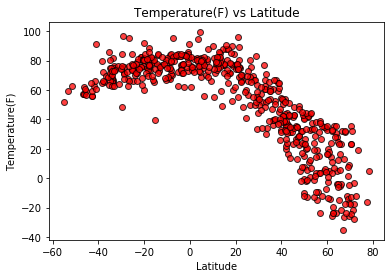

In [44]:
# build a scatter plot of Temperature(F) vs Latitude
x_values = city_df['lat']
y_vaules = city_df['city_temps']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Temperature(F) vs Latitude")
plt.savefig('TempvLat.png')
plt.show()


In [45]:
# The temperature vs latitude plot shows that in the northern hemispheres,as the distance from the equator increases, 
#the cities have colder temperatures.
#In the southern hemisphere, as distance from the equator increases, the cities generally have warmer temperatures.

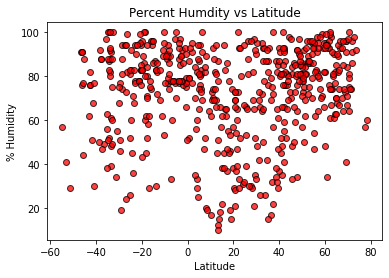

In [46]:
# build a scatter plot of % humidity vs Latitude
x_values = city_df['lat']
y_vaules = city_df['perc_humidity']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Percent Humdity vs Latitude")
plt.savefig('HumidityvLat.png')
plt.show()


In [47]:
#In the northern hemisphere, the % humidity generally increases as latitude increases.
#In the southern hemisphere, the % humidity generally increases as distance from the equator increases.

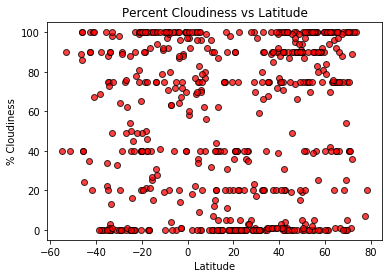

In [48]:
# build a scatter plot of % cloudiness vs Latitude
x_values = city_df['lat']
y_vaules = city_df['perc_cloudiness']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Percent Cloudiness vs Latitude")
plt.savefig('CloudsvLat.png')
plt.show()


In [49]:
#There is no clear pattern between the latitude of a city and the percent cloudiness.

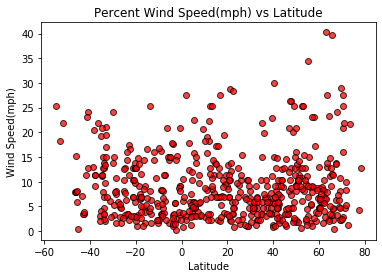

In [50]:
# build a scatter plot of Wind Speed vs Latitude
x_values = city_df['lat']
y_vaules = city_df['wind_speed']
plt.scatter(x_values, y_vaules, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Percent Wind Speed(mph) vs Latitude")
plt.savefig('WindvLat.png')
plt.show()


In [51]:
#Most cities experience wind speeds below 20 mph regardless of latitude.

In [52]:
#create a column for northern and southern hemisphere
bins = [-101, 0, 100]
labels = ['Southern Hemisphere', 'Northern Hemisphere']

#categorize the latitudes by bins
pd.cut(city_df['lat'], bins, labels=labels).head()

# Place the data series into a new column inside of the DataFrame
city_df["Hemisphere"] = pd.cut(city_df["lat"], bins, labels=labels)


#create a table with southern or northern hemisphere
hemispheres = city_df.groupby('Hemisphere').head()
hemispheres.reset_index(level =0, inplace = True)

# isolate northern hemisphere data
northern =hemispheres[hemispheres['Hemisphere'] == "Northern Hemisphere"]
southern =hemispheres[hemispheres['Hemisphere']=="Southern Hemisphere"]



The r-squared is: -0.8442213122512551


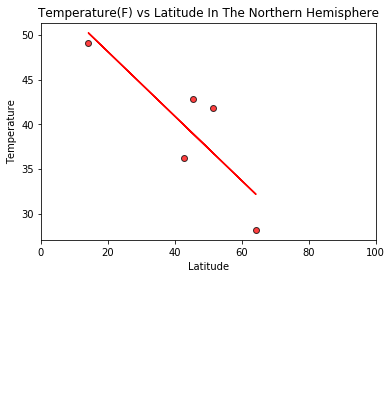

In [53]:
# Northern hemisphere Temperature (F) vs. Latitude

# Add the linear regression equation and line to plot
x_values = northern['lat']
y_values = northern['city_temps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0,100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Temperature(F) vs Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.show()


In [54]:
# With a r-squared value of almost -1, there is a negative correlation between temperature and 
#latitude in the northern hemisphere. This means the temperature of cities increase when they are located closer to
#the equator, and are colder when they are farther from the equator.

The r-squared is: 0.9227962854240137


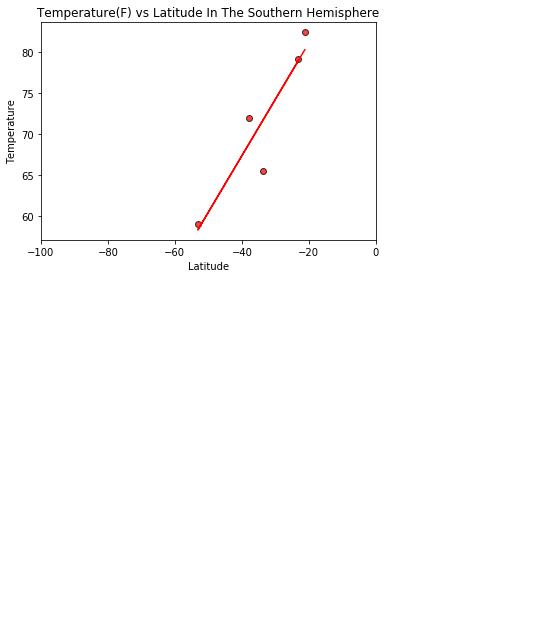

In [55]:
#Southern Hemisphere - Temperature (F) vs. Latitude
# Add the linear regression equation and line to plot
x_values = southern['lat']
y_values = southern['city_temps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Temperature(F) vs Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.show()


In [56]:
# The r-squared value suggests that when cities are closer to the equator, their temperatures are warmer. When they are
# farther from the equator, they are colder.

The r-squared is: 0.8888993813986114


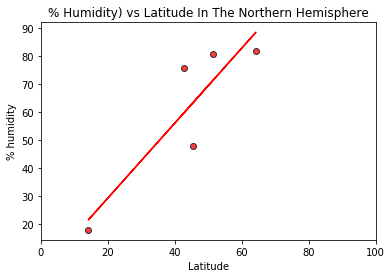

In [57]:
# Northern hemisphere Humidity (%) vs. Latitude

# build a scatter plot of % humidity vs Latitude
x_values = northern['lat']
y_values = northern['perc_humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0, 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("% Humidity) vs Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% humidity")   
plt.show()


In [58]:
# The r-squared value is close to 1, which suggests that humidity increases when the studied city is closer to the equator.
# Cities farther from the equator have lower humidity.

The r-squared is: 0.6248660464665856


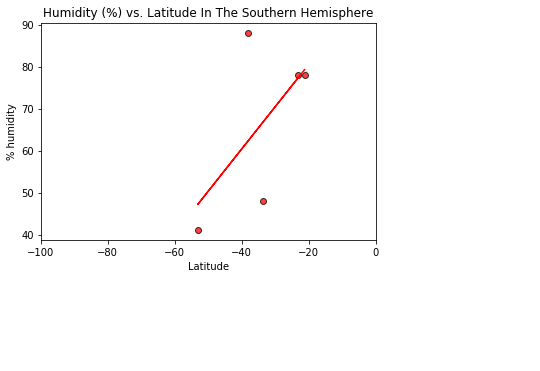

In [59]:
#Southern Hemisphere - Humidity (%) vs. Latitude

# build a scatter plot of % humidity vs Latitude
x_values = southern['lat']
y_values = southern['perc_humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Humidity (%) vs. Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% humidity")   
plt.show()



In [60]:
# The r-squared value is only slightly above 0, suggesting there is a weak correlation between proximity to the equator and
# higher humidity. The regression line doesn't fit any data points directly, meaning additional analyzation is needed to
# draw more certain conclusions. 

The r-squared is: 0.6788503155054125


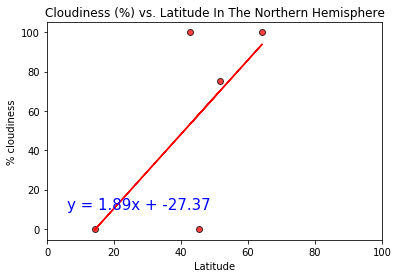

In [61]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude
    
    # build a scatter plot of % cloudiness vs Latitude
x_values = northern['lat']
y_values = northern['perc_cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0, 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Cloudiness (%) vs. Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% cloudiness")   
plt.show()


In [62]:
# The r-squared value is only slightly above 0, suggesting there is a weak correlation between proximity to the equator and
# percent cloudiness. The regression line isn't over any data points, meaning additional analyzation is needed to
# draw more certain conclusions. 

The r-squared is: 0.10952385209284232


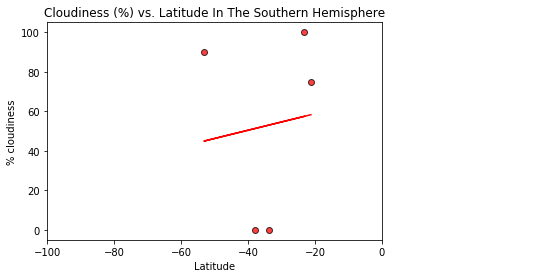

In [63]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

# build a scatter plot of % cloudiness vs Latitude
x_values = southern['lat']
y_values = southern['perc_cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Cloudiness (%) vs. Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("% cloudiness")   
plt.show()


In [64]:
# The r-squared value is only slightly above 0, suggesting there is no correlation between proximity to the equator and
# percent cloudiness. The regression line doesn't fit any data points directly, meaning additional analyzation is needed to
# draw more certain conclusions. 

The r-squared is: 0.5615872049252871


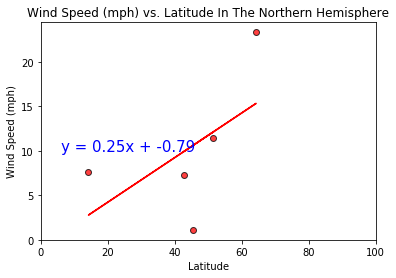

In [65]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern['lat']
y_values = northern['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(0, 100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue}")
plt.title("Wind Speed (mph) vs. Latitude In The Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")   
plt.show()


In [66]:
# In the northern hemisphere, wind speeds in a specific city decrease as distance from the equator increases. 
# The r-squared value is -0.91, supporting a strong correlation.

The r-squared is: -0.3148146120540372


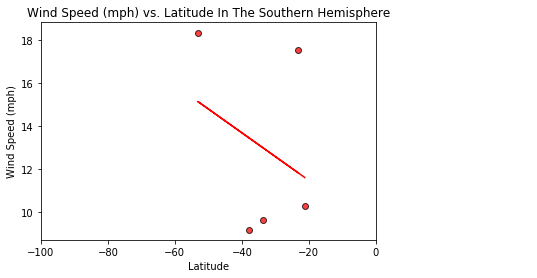

In [69]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern['lat']
y_values = southern['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlim(-100,0)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.title("Wind Speed (mph) vs. Latitude In The Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")   
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.show()


In [68]:
# In the southern hemisphere, wind speeds in a specific city decrease as distance from the equator increases. 
# The r-squared value is -0.78, supporting this correlation.